# Google Emotions Dataset
> https://www.kaggle.com/datasets/shivamb/go-emotions-google-emotions-dataset/data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/go-emotions-google-emotions-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 8.68M/8.68M [00:02<00:00, 3.83MB/s]

Extracting files...


Path to dataset files: C:\Users\wooll\.cache\kagglehub\datasets\shivamb\go-emotions-google-emotions-dataset\versions\1


In [2]:
import pandas as pd
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)

tqdm.pandas()

## Exploratory data analysis

In [3]:
df = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\go_emotions_dataset.csv')
df.head(5)

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.shape

(211225, 31)

In [5]:
emotions = set(df.columns[3:])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [25]:
# envy와 desire 비교

In [17]:
positive = {'admiration','amusement','approval','caring','desire','excitement','gratitude','joy','love','optimism','pride','relief'}
negative = {'sadness','fear','embarrassment','disapproval','disappointment','annoyance','anger','nervousness','remorse','grief','disgust'}
ambiguous = {'realization','surprise','curiosity','confusion','neutral'}

print(f'Fine grained emotions: {len(emotions)}')
print(f'Number of data: {len(df)}')
print(f'Number of positive emotions: {len(positive)}') 
print(f'Number of negative emotions: {len(negative)}')
print(f'Number of ambiguous emotions: {len(ambiguous)}')

Fine grained emotions: 28
Number of data: 211225
Number of positive emotions: 12
Number of negative emotions: 11
Number of ambiguous emotions: 5


In [19]:
df_emotion = pd.DataFrame()
df_emotion['emotion'] = list(emotions)
df_emotion['group'] = ''  # 초기화

# 안전한 방식으로 그룹 지정
df_emotion.loc[df_emotion['emotion'].isin(positive), 'group'] = 'positive'
df_emotion.loc[df_emotion['emotion'].isin(negative), 'group'] = 'negative'
df_emotion.loc[df_emotion['emotion'].isin(ambiguous), 'group'] = 'ambiguous'

df_emotion.head(3)

,emotion,group
0,nervousness,negative
1,disapproval,negative
2,excitement,positive


<Axes: xlabel='n', ylabel='emotion'>

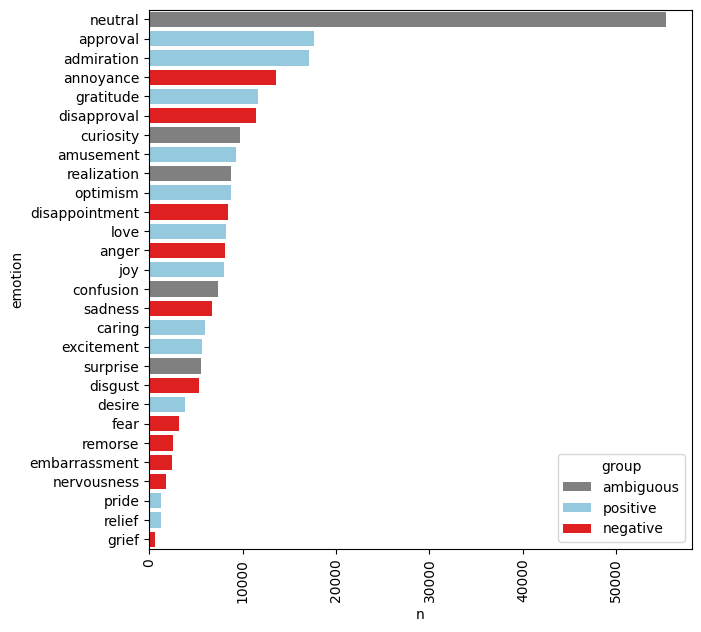

In [23]:
temp = df[list(emotions)].sum(axis=0)\
    .reset_index(name='n')\
    .rename(columns={'index': 'emotion'})\
    .merge(df_emotion, how='left', on='emotion')\
    .sort_values('n', ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(axis='x', rotation=90)

palette = {
    "positive": "skyblue", 
    "negative": "red", 
    "ambiguous": "gray"
}

sns.barplot(
    data=temp,
    x='n',
    y='emotion',
    hue='group',
    dodge=False,
    palette=palette,
    ax=ax
)
